# Описание проекта

Необходимо  установить параметры, влияющие на рыночную стоимость объектов недвижимости на основе данных объявлений и картографии. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность

## Изучение данных из файла

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = "\t")

print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Следующие колонки следует переименовать:
* cityCenters_nearest

В следующих колонках можно заменить тип данных:
* last_price - на int
* floors_total - на int
* is_apartment - на bool
* days_exposition - на int
* parks_around3000 - на int
* ponds_around3000 - на int

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Встречаются пропуски - значения NaN
Колонку first_day_exposition следует перевести в тип даты (время не приведено и не важно)

In [ ]:
data.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

Количество строк 23698 - достаточная для исследования выборка

Пропуски есть в 14 колонках:

более половины:
* is_apartment - практически все данные с пропусками, удалять нельзя, заполнить тоже :-)
* parks_nearest - данные получены автоматически
* ponds_nearest - данные получены автоматически
* balcony - можно попробовать заполнить

более 5 тыс:
* ceiling_height - можно попробовать заполнить
* airports_nearest - данные получены автоматически
* cityCenters_nearest - данные получены автоматически
* parks_around3000 - данные получены автоматически
* ponds_around3000 - данные получены автоматически

более 1 тыс:
* days_exposition
* kitchen_area
* living_area

менее 100:
* floors_total
* locality_name

Подавляющая часть пропусков содержится в данных, заполненных автоматически. Достаточно странно, что этих данных нехватает. Скорее всего, их можно достать. Предлагаю добавить запрос в bug report.

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


возможно некорректные значения:
* total_images - min 0 - подозрительно, возможно мошенники
* total_area - min 12 кв м - это слишком мало для квартиры, но м.б. ок для апартаментов или для Питера...
* rooms = 0 - не может быть, разве что это м.б. студия, надо проверить
* rooms = 19 - серьёзно? надо проверить и построить график зависимости от цены (last_price) и площади (total_area)
* ceiling_height = 1 и 100 - нереальные значения, надо разбираться
* living_area = 2 - слишком мало даже для апартаментов.. Согласно действующим СНиПам, минимальная площадь комнаты должна быть не менее 8 квадратных метров (п. 5.3 СП 5.413330.2011), но это сейчас, а раньше могли строить иначе
* floor не должен превышать floors_total - надо проверить
* kitchen_area = 1.3 кв м? В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м², но это сейчас, а раньше могли строить иначе
* airports_nearest = 0 м - квартира в аэропорту? нереальное значение, проверить на графике корреляции с расстоянием до центра
* parks_nearest = 1 - скорее всего, указано для привлечения внимания покупателя, на самом деле от дома до парка должно быть метров 10-20

In [ ]:
data[data['last_price'] < 1000000]['last_price'].sort_values()

8793      12190.0
14911    430000.0
17456    430000.0
16274    440000.0
9581     450000.0
           ...   
1781     990000.0
14341    990000.0
13420    995000.0
1761     999000.0
16862    999999.0
Name: last_price, Length: 225, dtype: float64

In [ ]:
data[data['last_price'] < 100000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


судя по всему цена ошибочная и должна быть умножена на 1000

In [ ]:
data['last_price'][8793] = data['last_price'][8793] * 1000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data['last_price'][8793]

12190000.0

In [ ]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104449,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104449,1.000000,0.653741,0.363340,0.085429,-0.006881,0.566487,0.026760,-0.025366,-0.008805,0.520167,0.029646,-0.026205,-0.206781,0.151086,-0.016324,0.159951,-0.084809,0.081103
total_area,0.115352,0.653741,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363340,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085429,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006881,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566487,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026760,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025366,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008805,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


(17.5, -0.5)

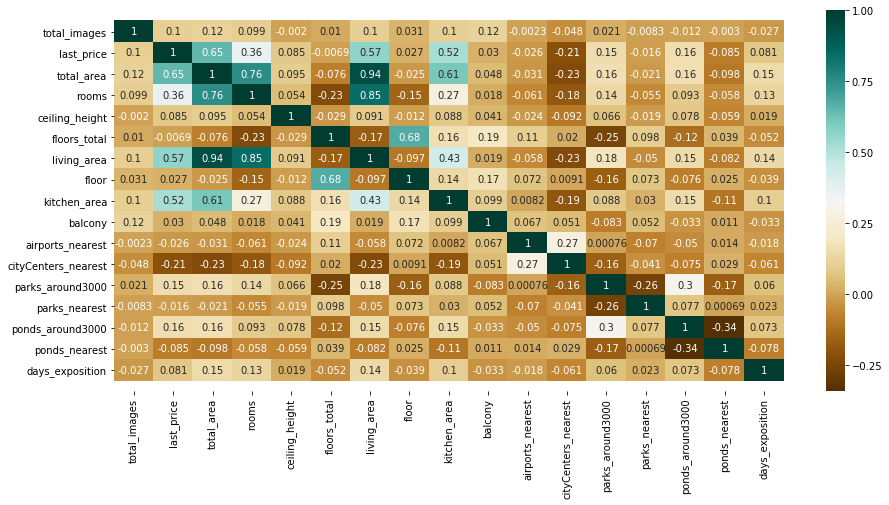

In [ ]:
plt.figure(figsize=(15, 7))

corr = data.select_dtypes(include=[np.number]).corr()

ax = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,
        cmap='BrBG')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Прямая корреляция между:
* living_area и total_area 94% - большую часть квартиры занимает именно жилая площадь
* living_area и rooms 85% - жилая площадь это и есть комнаты
* total_area и rooms 76% - исходя из двух пунктов выше
* floor и floors_total 68% - выше крыши квартир нет
* total_area и last_price 65% - платим в основном за площадь
* total_area и kitchen_area 61% - чем больше места вообще, тем больше кухню можно сделать

Ничего нового, обычно ночью темнее, чем днём. Корреляция общей площади с ценой ожидаемая, но не сильная, значит, можно предположить влияние других факторов

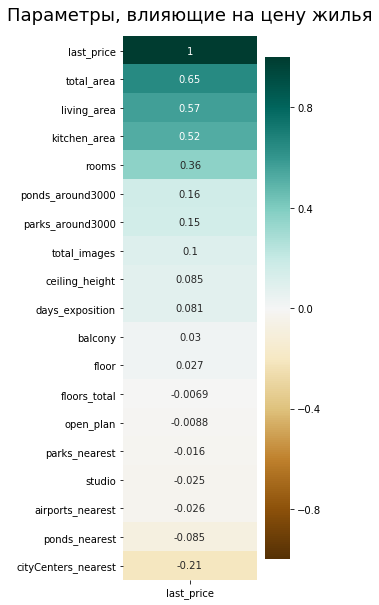

In [ ]:
plt.figure(figsize=(3, 10))
heatmap = sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, влияющие на цену жилья', fontdict={'fontsize':18}, pad=16);

In [ ]:
#цену жилья удобнее считать в миллионах
data['last_price'] = data['last_price'] / 1000000

### Вывод

Необходимо:
* переименование колонок
* замена типа данных
* обработка пропусков и некорректных значений

Возможно, что цена будет определяться преимущественно площадью жилья

## Предобработка данных

### Переименование колонок

In [ ]:
data = data.rename(columns={"cityCenters_nearest": "city_center_nearest"})

print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


### Обработка пропусков
* ceiling_height
* floors_total
* living_area
* is_apartment
* kitchen_area
* balcony
* locality_name
* airports_nearest
* city_center_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition

Сколько строк в данных останется, если удалить все пропуски?

In [ ]:
print(data.dropna().shape)

(250, 22)


Выборка недостаточна для исследования, следовательно, удалять все пропущенные значения нельзя, а нужно заполнить пропуски где возможно

#### balcony

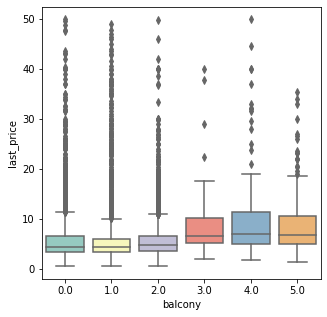

In [ ]:
plt.figure(figsize=(5, 5))

ax = sns.boxplot(x="balcony", y="last_price",
                 data=data.query('last_price < 50'), palette="Set3")

In [ ]:
print(data['balcony'].value_counts())
print(data['balcony'].count())

data['balcony'] = data['balcony'].fillna(0)

print(data['balcony'].value_counts())
print(data['balcony'].count())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64
12180
0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64
23699


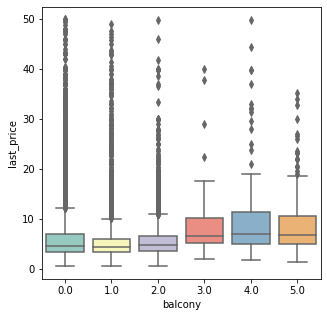

In [ ]:
plt.figure(figsize=(5, 5))

ax = sns.boxplot(x="balcony", y="last_price",
                 data=data.query('last_price < 50'), palette="Set3")

In [ ]:
def balcony_categorization(row):
    if row['balcony'] == 0:
        row['balcony_cat'] = 'без балкона'
        return row
    elif row['balcony'] > 2:
        row['balcony_cat'] = 'более 2 балконов'
        return row
    else:
        row['balcony_cat'] = '1-2 балкона'
        return row

data = data.apply(balcony_categorization, axis = 1)

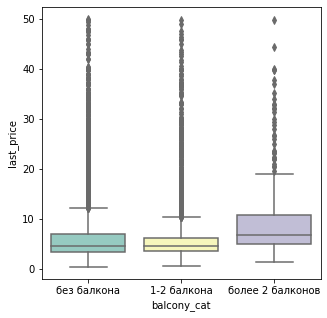

In [ ]:
plt.figure(figsize=(5, 5))

ax = sns.boxplot(x="balcony_cat", y="last_price",
                 data=data.query('last_price < 50'), palette="Set3")

Вывод: пропуски заполнены как отсутствие балконов, на распределение это не повлияло. Количество балконов не значительно влияет на цену жилья при 0-2 балконах и влияет на увеличение цены при 3 и более балконах. Таким образом, выделяются три группы - без балконов, с 1-2 балконами и с 3 и более балконами.

#### ceiling_height

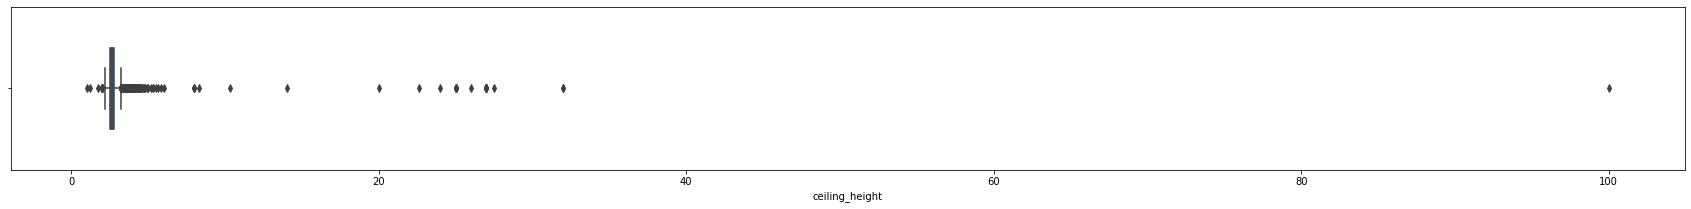

In [ ]:
plt.figure(figsize=(30, 3))
sns.boxplot(data[data['ceiling_height'] < 101]['ceiling_height'], width=0.5);

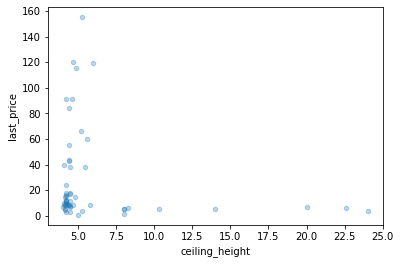

In [ ]:
data[(data['ceiling_height'] < 25) & (data['ceiling_height'] > 4)].plot(x = 'ceiling_height', y = 'last_price', kind = 'scatter', alpha = 0.3);

Увеличение цены с увеличением высоты потолка не происходит при высоте потолка более 5 м. Есть следующие группы некорректных значений:
* 100 - нереальное значение, лучше удалить как выброс
* от 20 до 40 - м.б. ошибка порядка и нужно делить на 10,
* от 7 до 15 - нереальные значения по низкой цене, лучше удалить
* до 2 м - нереальные значения, минимально допустимые 2,4 м, лучше удалить

In [ ]:
data[data['ceiling_height'] > 6]['ceiling_height'].count()

29

In [ ]:
def ceiling_issues(cell):
    if cell > 6:
        return float("NaN")
    elif cell < 2.4:
        return float("NaN")
    else:
        return cell

data['ceiling_height'] = data['ceiling_height'].apply(ceiling_issues)

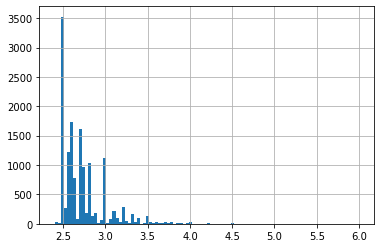

In [ ]:
data['ceiling_height'].hist(bins = 100);

In [ ]:
s = data['ceiling_height'].value_counts(normalize=True)

missing = data['ceiling_height'].isnull()
data.loc[missing,'ceiling_height'] = np.random.choice(s.index, size=len(data[missing]),p=s.values)

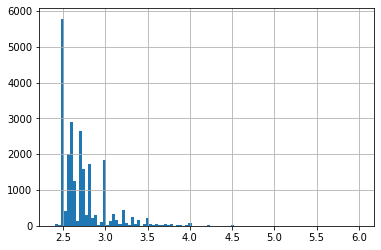

In [ ]:
data['ceiling_height'].hist(bins = 100);

In [ ]:
data['ceiling_height'].isna().sum()

0

Вывод: некорректные значения удалены, пропуски заполнены исходя из начального распределения, не нарушив его

#### days_exposition

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

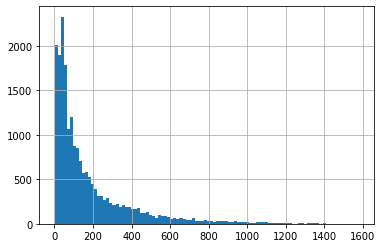

In [ ]:
data['days_exposition'].hist(bins = 100);

колонка отражает продолжительность событий, распределение соответствует ожидаемому распределению Пуассона

In [ ]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вывод: 0-45 дней - продажа очень быстрая,
232 + (232-45)х1,5 = 512,5 и более - продажа очень долгая

In [ ]:
s = data['days_exposition'].value_counts(normalize=True)

missing = data['days_exposition'].isnull()
data.loc[missing,'days_exposition'] = np.random.choice(s.index, size=len(data[missing]),p=s.values)

In [ ]:
data['days_exposition'].isna().sum()

0

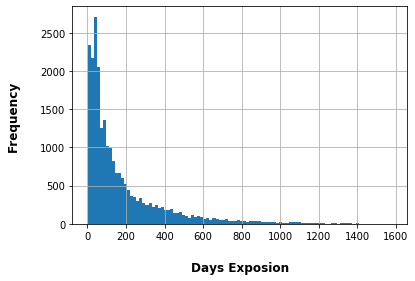

In [ ]:
ax = data['days_exposition'].hist(bins = 100);
ax.set_xlabel("Days Exposion", labelpad=20, weight='bold', size=12);
ax.set_ylabel("Frequency", labelpad=20, weight='bold', size=12);

In [ ]:
data['days_exposition'].describe()

count    23699.000000
mean       179.716823
std        218.616009
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вывод: пропуски заполнены без изменения исходного распределения

### Замена типа данных
Обязательные замены:
* last_price - на int, поскольку точность цены в копейках не играет роли; также, удобнее перевести значения в миллионы 
* days_exposition - на int - точность в полдня не имеет значения
* first_day_exposition - в формат времени, т.к. иначе работать с этими данными затруднительно

Необязательные замены:
* floors_total - на int, т.к. этажи не делятся на части
* is_apartment - на bool - т.к. подразумевается только да или нет
* parks_around3000 - на int - парки на части не делятся
* ponds_around3000 - на int - парки на части не делятся

In [ ]:
data['last_price'] = data['last_price'].astype('int')

In [ ]:
data['days_exposition'] = data['days_exposition'].astype('int')

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst = True)

### Проверка корректности данных

#### total_images

Малое количество фотографий в объявлении о продаже недвижимости - настораживающий фактор

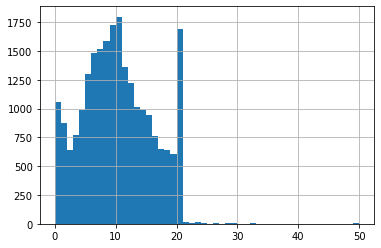

In [ ]:
data['total_images'].hist(bins = 50);

трёхглавое распределение настораживает... скорее всего, левая "голова" - это некачественные объявления, возможно, мошеннические; средняя "голова" - пик нормального распределения; правая "голова" - это единственное выдающееся значение - 20 фотографий. Возможно, этот пик связан с тем, что сервис подталкивает продавца выложить как минимум 20 фотографий для наилучшего представления объявлений, например, предлагает какие-либо бонусы вроде продвижения объявления на сервисе. Это может объяснять резкое падение количества фотографий начиная с 21-ой.

In [ ]:
data[data['total_images'] < 4].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,3340.00000,3340.000000,3340.000000,3340.000000,3340.000000,3316.000000,2958.000000,3340.000000,2836.000000,3340.000000,2539.000000,2541.000000,2542.000000,1094.000000,2542.000000,1342.000000,3340.000000
mean,1.33503,5.614371,60.203093,2.036826,2.732240,11.154403,34.349026,5.997605,10.457645,0.520060,28486.338322,14563.269579,0.599528,494.910420,0.831235,504.438897,185.614371
std,1.14795,7.351389,36.383731,1.098131,0.275394,6.881302,22.209011,5.010261,5.280440,0.901175,12984.936292,9537.368630,0.811255,341.520974,0.965481,275.877923,242.546805
min,0.00000,0.000000,13.000000,0.000000,2.400000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,181.000000,0.000000,9.000000,0.000000,13.000000,2.000000
25%,0.00000,3.000000,38.000000,1.000000,2.520000,5.000000,18.000000,2.000000,7.000000,0.000000,18397.500000,8460.000000,0.000000,294.000000,0.000000,287.500000,42.000000
50%,1.00000,4.000000,50.400000,2.000000,2.650000,9.000000,30.000000,4.000000,9.425000,0.000000,25797.000000,13210.000000,0.000000,456.000000,1.000000,476.500000,84.000000
75%,2.00000,6.000000,69.200000,3.000000,2.800000,16.000000,42.500000,8.000000,12.000000,1.000000,37407.000000,16972.000000,1.000000,619.250000,1.000000,712.000000,244.000000
max,3.00000,230.000000,517.000000,11.000000,5.800000,35.000000,332.000000,27.000000,107.000000,5.000000,84006.000000,65105.000000,3.000000,3064.000000,3.000000,1275.000000,1572.000000


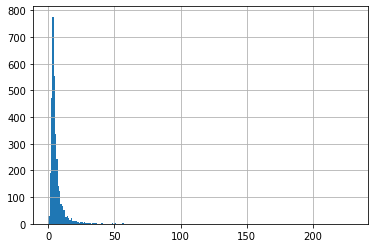

In [ ]:
data[data['total_images'] < 4]['last_price'].hist(bins = 230);

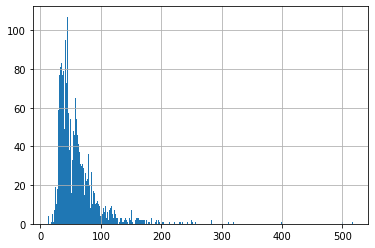

In [ ]:
data[data['total_images'] < 4]['total_area'].hist(bins = 517);

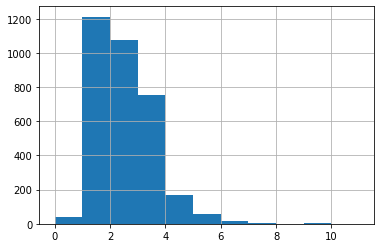

In [ ]:
data[data['total_images'] < 4]['rooms'].hist(bins = 11);

Вывод: распределения значений базовых параметров в срезе потенциально мошеннических объявлений соответствуют ожидаемым и могут являться важными в исследовании влияния на цену жилья. Предлагаю не избавляться от этих данных.

#### rooms

Смущает присутствие значений rooms = 0 и rooms = 19

In [ ]:
#рассмотрим статистику по срезу
data[data['rooms'] == 0].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,197.000000,197.000000,197.000000,197.0,197.000000,194.000000,183.000000,197.000000,0.0,197.000000,118.000000,118.000000,118.000000,29.000000,118.000000,69.000000,197.000000
mean,7.776650,2.883249,29.279746,0.0,2.749848,16.896907,18.865246,8.578680,NaN,1.010152,24516.432203,13388.610169,0.296610,594.862069,0.822034,526.043478,117.583756
std,5.079055,5.094172,25.855264,0.0,0.343338,6.925936,6.549527,6.290595,NaN,0.925764,12386.969865,5028.479861,0.559446,302.820164,0.873458,274.811509,162.083782
min,0.000000,0.000000,15.500000,0.0,2.400000,3.000000,2.000000,1.000000,NaN,0.000000,6989.000000,1261.000000,0.000000,38.000000,0.000000,72.000000,3.000000
25%,4.000000,2.000000,24.050000,0.0,2.550000,12.000000,16.000000,3.000000,NaN,0.000000,14567.000000,11618.000000,0.000000,396.000000,0.000000,348.000000,28.000000
50%,7.000000,2.000000,26.050000,0.0,2.700000,17.000000,18.000000,7.000000,NaN,1.000000,21460.000000,13595.500000,0.000000,535.000000,1.000000,528.000000,56.000000
75%,11.000000,3.000000,28.400000,0.0,2.800000,23.000000,19.950000,13.000000,NaN,2.000000,34004.750000,16383.750000,0.000000,761.000000,1.000000,674.000000,135.000000
max,21.000000,71.000000,371.000000,0.0,5.800000,35.000000,68.000000,26.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000


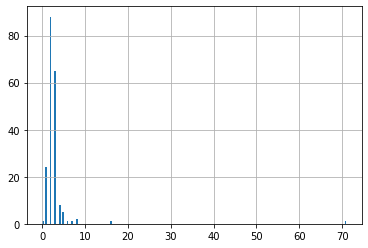

In [ ]:
#проверка на реалистичность - жильё без комнат должно быть недорогим...
data[data['rooms'] == 0]['last_price'].hist(bins = 197);

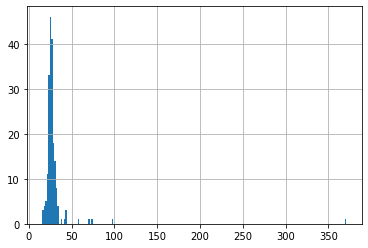

In [ ]:
#проверка на реалистичность - жильё без комнат должно быть небольшим...
data[data['rooms'] == 0]['total_area'].hist(bins = 197);

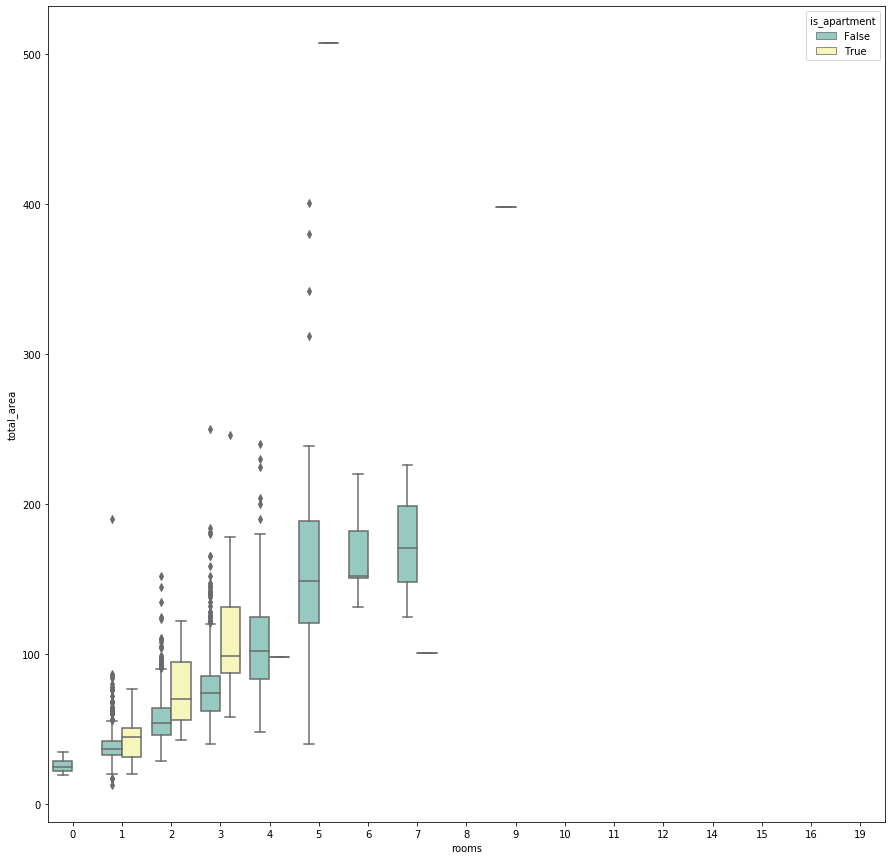

In [ ]:
#проверка гипотезы - этот срез недвижимости представлен апартаментами

plt.figure(figsize=(15, 15))

ax = sns.boxplot(x="rooms", y="total_area", hue="is_apartment",
                 data=data, palette="Set3")

На представленном графике видно, что:
* апартаменты в выборке имеют только 1, 2 или 3 комнаты. Следовательно, срез недвижимости без комнат представлен, скорее всего, студиями.
* представительные данные с апартаментами (1-3 комнаты) имеют большие средние площади жилья, чем квартиры. Проверим так ли это по отношению к ценам.

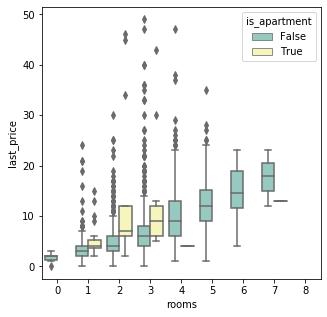

In [ ]:
plt.figure(figsize=(5, 5))

ax = sns.boxplot(x="rooms", y="last_price", hue="is_apartment",
                 data=data.query('rooms <  9 & last_price < 50'), palette="Set3")

Да, с ценами обстоит такая же ситуация.

После 9 комнат присутствуют пропуски в значениях is_apartment. Проверим сколько их:

In [ ]:
print(f"Всего строк среза недвижимости с более 9 комнат: \t\t {data[data['rooms'] > 9]['rooms'].count()}")
print(f"Значений is_apartment в срезе недвижимости с более 9 комнат: \t {data[data['rooms'] > 9]['is_apartment'].count()}")
print(f"Всего строк среза недвижимости с 0-9 комнат: \t\t\t {data[data['rooms'] <= 9]['rooms'].count()}")
print(f"Значений is_apartment в срезе недвижимости с 0-9 комнат: \t {data[data['rooms'] <= 9]['is_apartment'].count()}")

Всего строк среза недвижимости с более 9 комнат: 		 11
Значений is_apartment в срезе недвижимости с более 9 комнат: 	 0
Всего строк среза недвижимости с 0-9 комнат: 			 23688
Значений is_apartment в срезе недвижимости с 0-9 комнат: 	 2775


проверим распределение

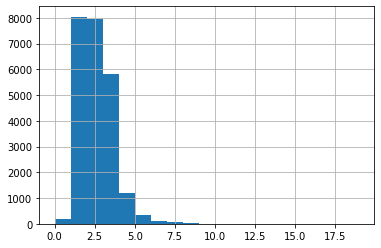

In [ ]:
data['rooms'].hist(bins = 19);

In [ ]:
data[data['rooms'] > 9].pivot_table(index = 'rooms', values = ['last_price', 'total_area'], aggfunc = ['count', 'mean']).sort_values(by = ('mean','last_price'))

count                  mean            
      last_price total_area last_price  total_area
rooms                                             
11             2          2       25.0  188.900000
10             3          3       26.0  259.566667
14             2          2       26.5  304.200000
16             1          1       28.0  270.000000
19             1          1       32.0  374.600000
15             1          1       65.0  590.000000
12             1          1      420.0  900.000000

Вывод: жильё с 0 комнатами, вероятно, представлено студиями, а с 9 и более комнат действительно должны стоить недёшево и иметь большую площадь, так что данные в изученных срезах, скорее всего, реальные

#### floor vs floors_total

In [ ]:
data.query('floor > floors_total').shape[0]

0

Вывод: столбец floor в порядке

#### airports_nearest

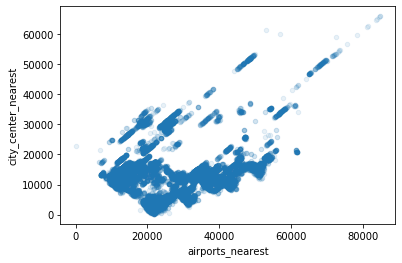

In [ ]:
data.plot(x = 'airports_nearest', y = 'city_center_nearest', kind = 'scatter', alpha = 0.1);

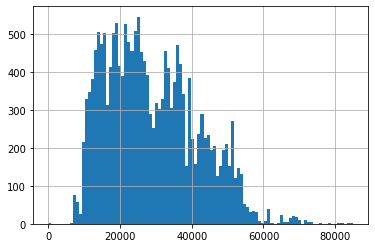

In [ ]:
data['airports_nearest'].hist(bins = 100);

In [ ]:
data['airports_nearest'].sort_values().head()

21085       0.0
12899    6450.0
4017     6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64

Вывод: видно, что данные группируются по географическому признаку между аэропортом и центром, что логично. Нулевое значение - ошибка, нужно отметить в bug report, и скорее всего, это значение возможно получить автоматически по карте.

#### parks_nearest 

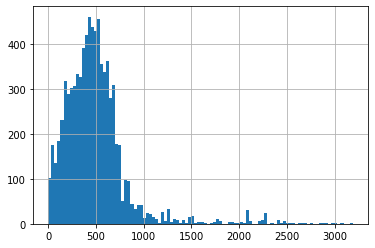

In [ ]:
data['parks_nearest'].hist(bins = 100);

In [ ]:
data['parks_nearest'].sort_values().head()

14624    1.0
11949    3.0
22941    4.0
9344     7.0
20193    9.0
Name: parks_nearest, dtype: float64

Вывод: ну немного приврали, ну бывает. Картину не попортит

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

In [ ]:
#цену квадратного метра удобнее всего считать в тысячах руб.
data['sq_m_price'] = (data['last_price'] * 1000) / data['total_area'] 

In [ ]:
data['sq_m_price'].describe()

count    23699.000000
mean        89.619970
std         51.591914
min          0.000000
25%         65.573770
50%         85.470085
75%        104.477612
max       1907.500000
Name: sq_m_price, dtype: float64

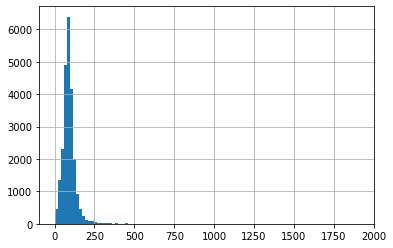

In [ ]:
data['sq_m_price'].hist(bins = 100);

### Дата публикации объявления

In [ ]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

data[['first_day_exposition', 'exposition_year', 'exposition_month', 'exposition_weekday']].head()

,first_day_exposition,exposition_year,exposition_month,exposition_weekday
0,2019-03-07,2019,3,3
1,2018-12-04,2018,12,1
2,2015-08-20,2015,8,3
3,2015-07-24,2015,7,4
4,2018-06-19,2018,6,1


In [ ]:
data['exposition_month_two'] = data['first_day_exposition'].astype('datetime64[M]')
data[['exposition_month', 'exposition_month_two']].head()

,exposition_month,exposition_month_two
0,3,2019-03-01
1,12,2018-12-01
2,8,2015-08-01
3,7,2015-07-01
4,6,2018-06-01


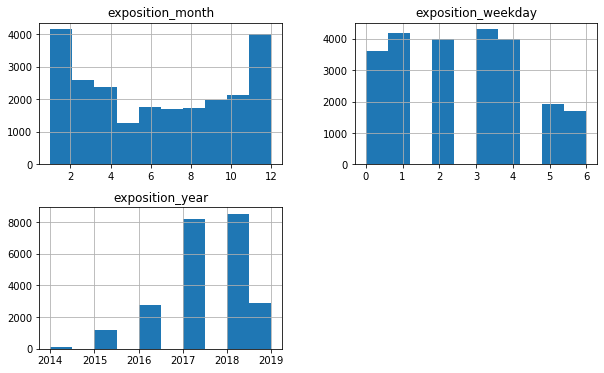

In [ ]:
data[['first_day_exposition', 'exposition_year', 'exposition_month', 'exposition_weekday']].hist(figsize = (10,6));

Вывод: похоже, что летом опубликованных объявлений было значительно меньше, чем зимой; на выходных люди публикуют объявления в 2 раза реже; количество объявлений со временем растёт, что отчасти м.б. связано с развитием сервиса Яндекс.Недвижимость, однако в 2019 году наблюдается спад количества объявлений (который м.б. связан с наличием данных за неполный год)

### Дата продажи

In [ ]:
def deal_data(row):
    if pd.isna(row['first_day_exposition']) == False:
        row['deal_data'] = row['first_day_exposition'] + pd.Timedelta(days=row['days_exposition'])
        return row

data = data.apply(deal_data, axis = 1)

In [ ]:
data['deal_weekday'] = data['deal_data'].dt.weekday
data['deal_month'] = data['deal_data'].dt.month
data['deal_year'] = data['deal_data'].dt.year

data[['deal_data', 'deal_year', 'deal_month', 'deal_weekday']].head()

,deal_data,deal_year,deal_month,deal_weekday
0,2019-08-09,2019,8,4
1,2019-02-23,2019,2,5
2,2017-02-28,2017,2,1
3,2016-09-20,2016,9,1
4,2018-10-18,2018,10,3


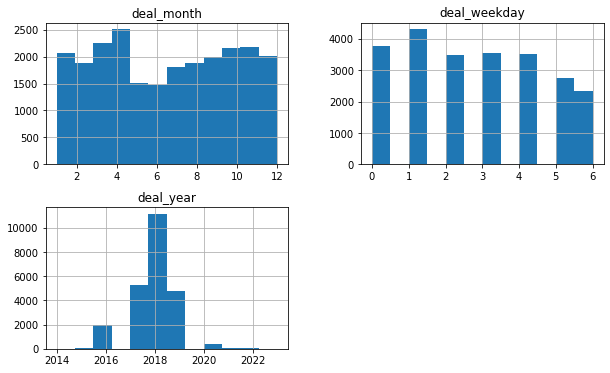

In [ ]:
data[['deal_year', 'deal_month', 'deal_weekday']].hist(bins = 12, figsize = (10,6));

Вывод: количество сделок с недвижимостью минимально в мае (все заняты свадьбой) и постепенно увеличивается к апрелю с пиком в июле (госкорпорациям выплачивают бонусы, которые нужно пристроить в недвиге); на выходных сделок совершается относительно не много; количество сделок растёт к 2018 году и резко падает в 2019 г. Оговорки те же, что и в предыдущем разделе, плюс - снятие объявления не обязательно совпадает со сделкой, так что эти выводы м.б. далеки от реальности. 

### Категоризация этажа квартиры

In [ ]:
def floor_categorization(row):
    if pd.isna(row['floor']) == False:
        if row['floor'] == 1:
            row['floor_cat'] = 'первый'
            return row
        elif row['floor'] == row['floors_total']:
            row['floor_cat'] = 'последний'
            return row
        else:
            row['floor_cat'] = 'другой'
            return row

data = data.apply(floor_categorization, axis = 1)

In [ ]:
data[['floor', 'floors_total', 'floor_cat']].head()

,floor,floors_total,floor_cat
0,8,16.0,другой
1,1,11.0,первый
2,4,5.0,другой
3,9,14.0,другой
4,13,14.0,другой


In [ ]:
data['floor_cat'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_cat, dtype: int64

In [ ]:
data.pivot_table(index = 'floor_cat', values = ['last_price', 'sq_m_price']).sort_values(by = 'sq_m_price')

,last_price,sq_m_price
floor_cat,,
первый,4.310936,71.776724
последний,6.883993,83.953238
другой,6.186117,93.686975


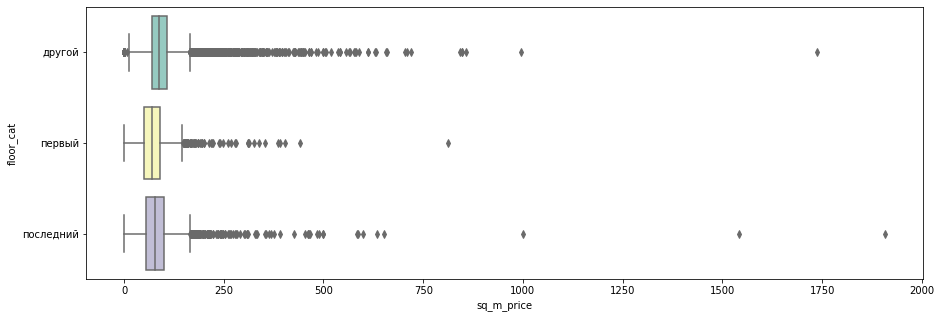

In [ ]:
plt.figure(figsize=(15, 5))

ax = sns.boxplot(x="sq_m_price", y="floor_cat",
                 data=data, palette="Set3")

Вывод: 1) количество объявлений на первом и последних этажах примерно равное, а на других этажах - в разы превосходит; 2) на первом этаже в среднем самое дешёвое жильё

### Соотношение площадей

In [ ]:
data['living_to_total_area'] = data['living_area'] / data['total_area']
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']

In [ ]:
data['living_to_total_area'].describe()

count    21796.000000
mean         0.564766
std          0.105368
min          0.021583
25%          0.495177
50%          0.567860
75%          0.637880
max          1.000000
Name: living_to_total_area, dtype: float64

Максимальное значение равно 1, т.е. вся площадь является жилой.

Из определения жилой площади:

Жилая площадь – это сумма площадей жилых комнат. Общая площадь квартиры – это сумма площадей всех комнат, составляющих данную квартиру, в том числе подсобных помещений, кроме лоджий, балконов, веранд и террас. К подсобным помещениям относятся площади кухонь, коридоров, ванных, санузлов, встроенных шкафов, кладовых, а также площадь, занятая внутриквартирной лестницей.

Таким образом, в жилье со значением этого коэффициента 1 отсутствует ванная / санузел, коридоры и пр., чего быть не может. Проанализируем количество подобных объявлений


In [ ]:
data['living_to_total_area'].sort_values(ascending = False).head(10)

9861     1.000000
12691    1.000000
10606    0.989315
20256    0.983447
15513    0.975754
1992     0.973262
4339     0.972222
3891     0.967330
551      0.967078
21227    0.957746
Name: living_to_total_area, dtype: float64

Подобных объявлений всего 2. Но также встречается много объявлений, в которых значение этого коэффициента приближается к 1. Это возможно либо при огромной площади, так, что доля нежилых помещений становится низкой, либо при наличии ошибки в данных. Причём, ошибка может являться и преднамеренной для привлечения покупателей. Посмотрим на абсолютные значения площади нежилых помещений

In [ ]:
data['nonliving_area'] = data['total_area'] - data['living_area']
data[['total_area', 'living_area', 'living_to_total_area', 'nonliving_area']].sort_values(by = 'living_to_total_area', ascending = False).head()

,total_area,living_area,living_to_total_area,nonliving_area
12691,24.20,24.2,1.000000,0.00
9861,25.00,25.0,1.000000,0.00
10606,25.27,25.0,0.989315,0.27
20256,102.70,101.0,0.983447,1.70
15513,33.82,33.0,0.975754,0.82


Минимальная площадь санузла 3 кв м, всё что меньше - скорее всего, ошибка. Посчитаем количество таких значений:

In [ ]:
data.query('nonliving_area < 3').count().max()

28

А что если общая площадь не равна сумме жилой и кухни?

In [ ]:
data['total_minus_kitchen_and_living_area'] = data['total_area'] - (data['kitchen_area'] + data['living_area'])
data[['total_area', 'living_area', 'kitchen_area', 'total_minus_kitchen_and_living_area']].sort_values(by = 'total_minus_kitchen_and_living_area').head()

,total_area,living_area,kitchen_area,total_minus_kitchen_and_living_area
7239,90.00,76.4,43.4,-29.80
4366,47.70,39.8,28.2,-20.30
6802,69.00,64.0,25.0,-20.00
11579,33.00,26.0,26.0,-19.00
12530,39.03,36.9,18.6,-16.47


Вот и вскрылся грандиозный scam. Посчитаем сколько значений total_minus_kitchen_and_living_area ниже 0:

In [ ]:
data.query('total_minus_kitchen_and_living_area < 0').count().max()

64

Вывод: в одной или нескольких колонках с площадями жилья (общая, жилая, кухня) имеются ошибки, что было выявлено при рассмотрении вычисленной колонки нежилой площади - 28 строк со значениями ниже возможных минимальных, и вычисленной колонки разницы общей площади с жилой и кухней - 64 строки с нереальными значениями ниже нуля. Заменить неверные значения некорректно, т.к. не ясна какая из колонок ошибочна. Удаление всех ошибочных строк предлагаю пока не делать, поскольку по отношению ко всей выборке их немного. В bug report!

In [ ]:
data['kitchen_to_total_area'].describe()

count    21421.000000
mean         0.187355
std          0.072968
min          0.025381
25%          0.133333
50%          0.172414
75%          0.232416
max          0.787879
Name: kitchen_to_total_area, dtype: float64

можно проверить минимальные значения kitchen_area и соотнести с реальностью

In [ ]:
data['kitchen_area'].sort_values().head()

20217    1.3
9138     2.0
6262     2.0
21419    2.0
19642    2.0
Name: kitchen_area, dtype: float64

минимальная площадь кухни — 8 м², кухонной зоны в кухне-столовой — 6 м². Возможно, значения ниже 6 кв. м относятся к объявлениям о продаже апартаментов...

In [ ]:
data[data['kitchen_area'] < 6]['is_apartment'].value_counts()

False    165
True       2
Name: is_apartment, dtype: int64

Похоже, дело не в апартаментах. Посмотрим сколько вообще значений площади кухни меньше 6 кв. м

In [ ]:
data[data['kitchen_area'] < 6]['kitchen_area'].count()

1703

Возможно, данные всё же реальные...

Выполнил поиск в интернете, действительно, оказывается в Питере есть такие квартиры и апартаменты с площадью кухни менее 2 кв. м.

## Исследовательский анализ данных

### Базовые параметры жилья

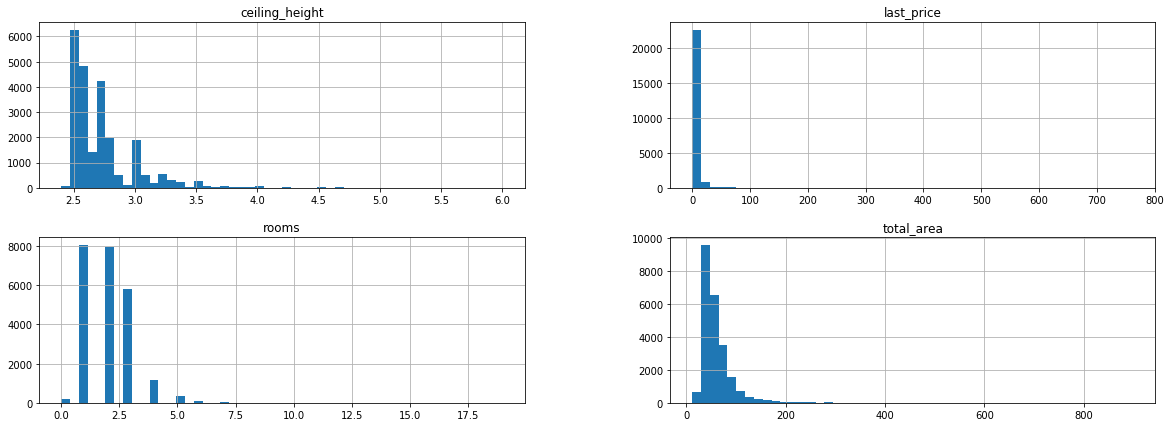

In [ ]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].hist(bins = 50, figsize = (20,7));

### Фильтрация данных
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [ ]:
data_filtered = data.query('total_images > 4 & rooms < 9 & airports_nearest > 0 & parks_nearest > 10 & nonliving_area > 3 & total_minus_kitchen_and_living_area >= 0')

In [ ]:
data_filtered['locality_name'].value_counts()

Санкт-Петербург      5417
Пушкин                159
Петергоф              114
Колпино                97
Кронштадт              59
Сестрорецк             53
Красное Село           33
Павловск               20
посёлок Стрельна       16
Зеленогорск            12
посёлок Парголово       7
Ломоносов               6
Name: locality_name, dtype: int64

In [ ]:
data['locality_name'].value_counts()

Санкт-Петербург                          15721
посёлок Мурино                             522
посёлок Шушары                             440
Всеволожск                                 398
Пушкин                                     369
                                         ...  
поселок Коммунары                            1
деревня Мануйлово                            1
поселок городского типа Большая Ижора        1
деревня Пикколово                            1
поселок Возрождение                          1
Name: locality_name, Length: 364, dtype: int64

Вывод: отфильтровано достаточно много строк, охватывающих, скорее всего, преимущественно малые поселения

### Факторы стоимости жилья

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

#### Площадь

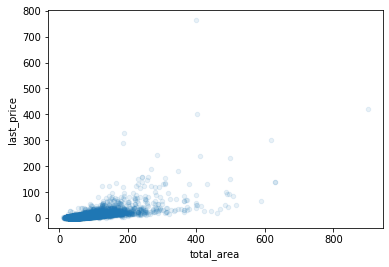

In [ ]:
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', alpha = 0.1);

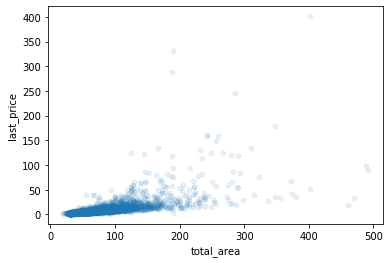

In [ ]:
data_filtered.plot(x = 'total_area', y = 'last_price', kind = 'scatter', alpha = 0.1);

Вывод: цена прямо зависит от площади жилья

#### Удалённость от центра

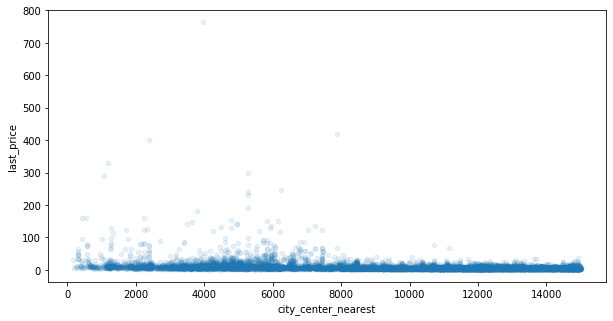

In [ ]:
data[data['city_center_nearest'] < 15000].plot(x = 'city_center_nearest', y = 'last_price', kind = 'scatter', alpha = 0.1, figsize = (10,5));

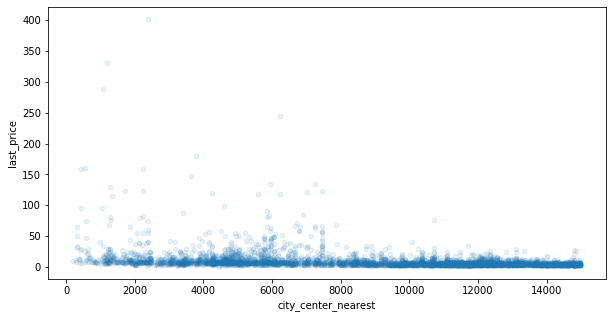

In [ ]:
data_filtered[data_filtered['city_center_nearest'] < 15000].plot(x = 'city_center_nearest', y = 'last_price', kind = 'scatter', alpha = 0.1, figsize = (10,5));

Вывод: цена не зависит от удалённости от центра, но в интервале 0 - 8 км от центра выделяется область с высокими ценами на жильё

#### Этаж

In [ ]:
data.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = ('min','mean','median', 'max', 'count')).sort_values(by = 'median', ascending = False)

,count,max,mean,median,min
floor_cat,,,,,
другой,17446.0,330.0,6.186117,4.0,0.0
последний,3336.0,763.0,6.883993,4.0,0.0
первый,2917.0,135.0,4.310936,3.0,0.0


In [ ]:
data_filtered.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = ('min','mean','median', 'max', 'count')).sort_values(by = 'median', ascending = False)

,count,max,mean,median,min
floor_cat,,,,,
другой,4411.0,330.0,8.455906,5.0,2.0
последний,879.0,401.0,9.278726,5.0,2.0
первый,717.0,135.0,6.052999,4.0,1.0


Вывод: цена зависит от категории этажа. Высокие цены на последнем этаже обусловлены продажей пентхаусов, низкие цены на первом этаже обусловдены малым количеством света, большим шумовым и экологическим загрязнением, а также низкой безопасностью.

Из тренда выбиваются минимальные цены квартир на последнем этаже, что связано с близостью обветшалой крыши в низком ценовом сегменте

#### Время публикации

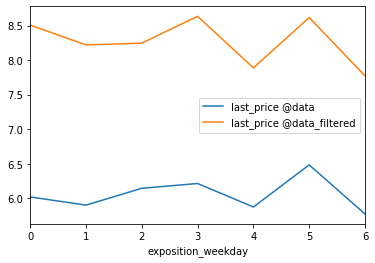

In [ ]:
ax = data.pivot_table(index = 'exposition_weekday', values = 'last_price').plot();
data_filtered.pivot_table(index = 'exposition_weekday', values = 'last_price').plot(ax=ax);
ax.legend(['last_price @data', 'last_price @data_filtered']);

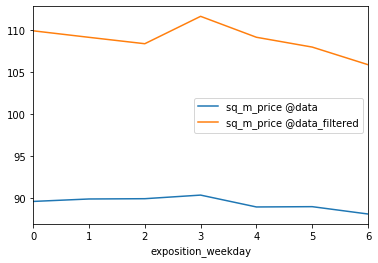

In [ ]:
ax = data.pivot_table(index = 'exposition_weekday', values = 'sq_m_price').plot();
data_filtered.pivot_table(index = 'exposition_weekday', values = 'sq_m_price').plot(ax=ax);
ax.legend(['sq_m_price @data', 'sq_m_price @data_filtered']);

Вывод: цена не зависит от дня публикации, но максимальные цены по четвергам, а максимальные - по воскресеньям

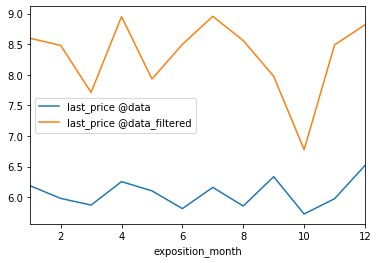

In [ ]:
ax = data.pivot_table(index = 'exposition_month', values = 'last_price').plot();
data_filtered.pivot_table(index = 'exposition_month', values = 'last_price').plot(ax=ax);
ax.legend(['last_price @data', 'last_price @data_filtered']);

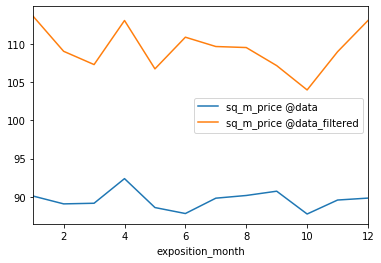

In [ ]:
ax = data.pivot_table(index = 'exposition_month', values = 'sq_m_price').plot();
data_filtered.pivot_table(index = 'exposition_month', values = 'sq_m_price').plot(ax=ax);
ax.legend(['sq_m_price @data', 'sq_m_price @data_filtered']);

Вывод: цена слабо зависит от месяца - минимальна в октябре и максимальна к началу года и середине лета

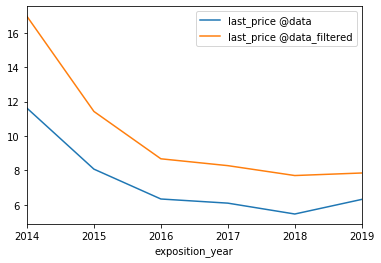

In [ ]:
ax = data.pivot_table(index = 'exposition_year', values = 'last_price').plot();
data_filtered.pivot_table(index = 'exposition_year', values = 'last_price').plot(ax=ax);
ax.legend(['last_price @data', 'last_price @data_filtered']);

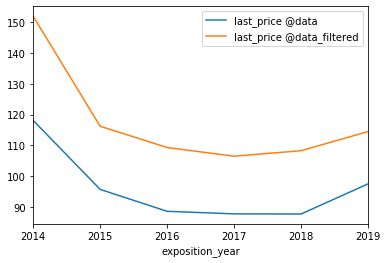

In [ ]:
ax = data.pivot_table(index = 'exposition_year', values = 'sq_m_price').plot();
data_filtered.pivot_table(index = 'exposition_year', values = 'sq_m_price').plot(ax=ax);
ax.legend(['last_price @data', 'last_price @data_filtered']);

Вывод: цена зависит от года - с 2014 по 2017 она падала, а потом начала расти

In [ ]:
data[['last_price', 'sq_m_price',  'total_area', 'rooms', 'city_center_nearest']].corr()

,last_price,sq_m_price,total_area,rooms,city_center_nearest
last_price,1.000000,0.750772,0.653897,0.363401,-0.206572
sq_m_price,0.750772,1.000000,0.350716,0.111544,-0.325602
total_area,0.653897,0.350716,1.000000,0.758344,-0.231446
rooms,0.363401,0.111544,0.758344,1.000000,-0.184864
city_center_nearest,-0.206572,-0.325602,-0.231446,-0.184864,1.000000


Наблюдается зависимость цены от общей площади, но незначительная 0,65.

sq_m_price - дериватив от площади и цены, так что он не в счёт.

Помимо этого, есть зависимость общей площади от количества комнат 0,76

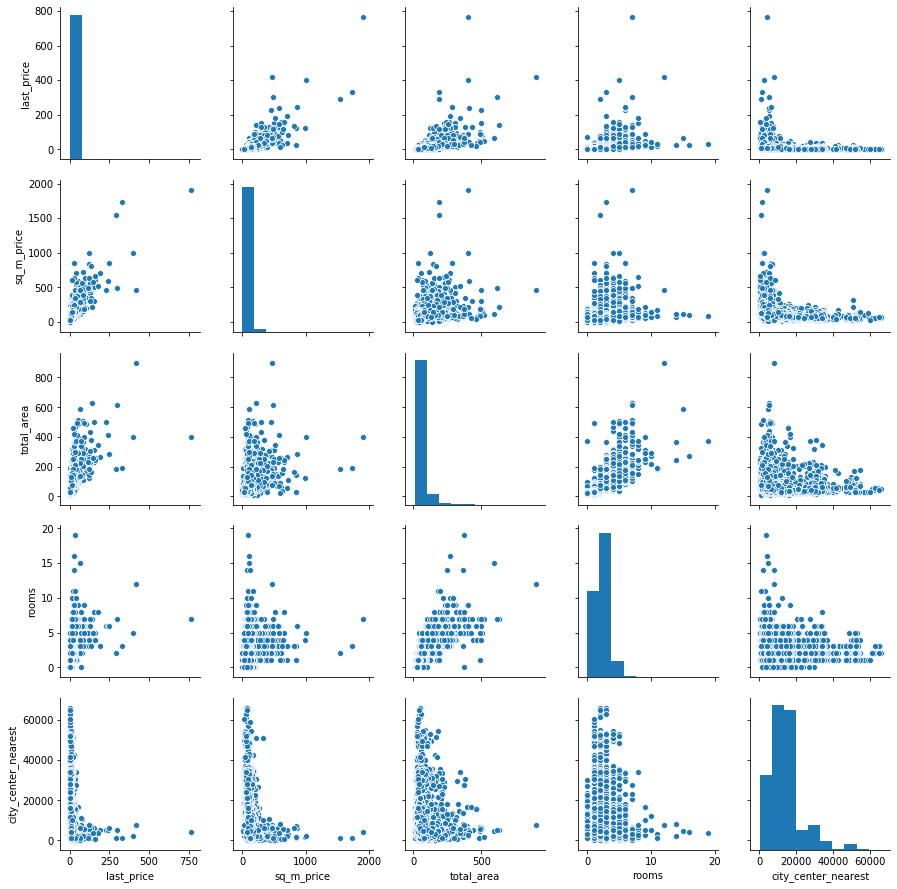

In [ ]:
sns.pairplot(data[['last_price', 'sq_m_price',  'total_area', 'rooms', 'city_center_nearest']]);

Общий вывод: цена в основном зависит от площади, этажа и даты публикации объявления

### Населённые пункты

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [ ]:
locality_sq_m = data.pivot_table(index = 'locality_name', values = 'sq_m_price', aggfunc = ['count', 'mean']).sort_values(by = ('count', 'sq_m_price'), ascending = False).head(10)
locality_sq_m

,count,mean
,sq_m_price,sq_m_price
locality_name,,
Санкт-Петербург,15721,105.530933
посёлок Мурино,522,73.153909
посёлок Шушары,440,68.741117
Всеволожск,398,58.538882
Пушкин,369,94.027001
Колпино,338,65.203008
посёлок Парголово,327,79.097536
Гатчина,307,57.822803


In [ ]:
locality_sq_m_filtered = data_filtered.pivot_table(index = 'locality_name', values = 'sq_m_price', aggfunc = ['count', 'mean']).sort_values(by = ('count', 'sq_m_price'), ascending = False).head(10)
locality_sq_m_filtered

,count,mean
,sq_m_price,sq_m_price
locality_name,,
Санкт-Петербург,5417,112.224984
Пушкин,159,97.554695
Петергоф,114,75.215044
Колпино,97,65.871543
Кронштадт,59,69.830463
Сестрорецк,53,99.971555
Красное Село,33,65.362246
Павловск,20,79.248659


In [ ]:
print(f"Самая высокая стоимость квадратного метра в среднем в: \n {locality_sq_m['mean','sq_m_price'].sort_values(ascending = False).head(1)}")
print()
print(f"Самая низкая стоимость квадратного метра в среднем в: \n {locality_sq_m['mean','sq_m_price'].sort_values().head(1)}")

Самая высокая стоимость квадратного метра в среднем в: 
 locality_name
Санкт-Петербург    105.530933
Name: (mean, sq_m_price), dtype: float64

Самая низкая стоимость квадратного метра в среднем в: 
 locality_name
Выборг    48.26228
Name: (mean, sq_m_price), dtype: float64


In [ ]:
print(f"Самая высокая стоимость квадратного метра в среднем в: \n {locality_sq_m_filtered['mean','sq_m_price'].sort_values(ascending = False).head(1)}")
print()
print(f"Самая низкая стоимость квадратного метра в среднем в: \n {locality_sq_m_filtered['mean','sq_m_price'].sort_values().head(1)}")

Самая высокая стоимость квадратного метра в среднем в: 
 locality_name
Санкт-Петербург    112.224984
Name: (mean, sq_m_price), dtype: float64

Самая низкая стоимость квадратного метра в среднем в: 
 locality_name
Красное Село    65.362246
Name: (mean, sq_m_price), dtype: float64


Вывод: максимальная стоимость в Санкт-Петербурге, минимальная - либо в Выборге, либо в Красном Селе... - результат зависит от фильтрации

### Центр Санкт-Петербурга
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [ ]:
data[data['locality_name'] == 'Санкт-Петербург'].shape

(15721, 36)

In [ ]:
data_filtered[data_filtered['locality_name'] == 'Санкт-Петербург'].shape

(5417, 36)

In [ ]:
data['center_km'] = round(data['city_center_nearest'] / 1000)
pvt_distance = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index = 'center_km', values = 'last_price', aggfunc = ['count', 'mean'])
pvt_distance.head(10)

,count,mean
,last_price,last_price
center_km,,
0.0,27,31.037037
1.0,192,20.791667
2.0,310,17.351613
3.0,350,10.660000
4.0,688,12.803779
5.0,920,14.048913
6.0,618,14.868932
7.0,420,14.290476


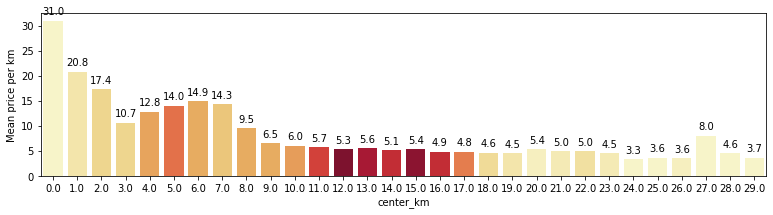

In [ ]:
def colors_from_values(values, palette_name):
    normalized = (values - min(values)) / (max(values) - min(values))
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

plt.figure(figsize=(13, 3))
splot = sns.barplot(data = pvt_distance, x = pvt_distance.index, y = ('mean', 'last_price'), palette = colors_from_values(pvt_distance[('count', 'last_price')], "YlOrRd"));
splot.set_ylabel('Mean price per km')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


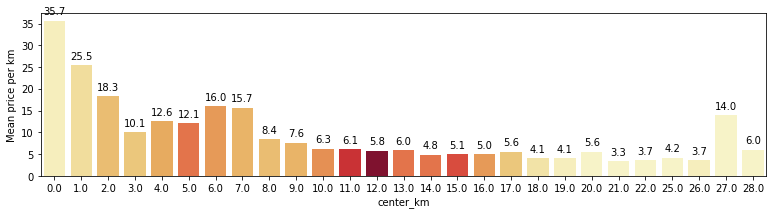

In [ ]:
data_filtered['center_km'] = round(data_filtered['city_center_nearest'] / 1000)
pvt_distance_filtered = data_filtered[data_filtered['locality_name'] == 'Санкт-Петербург'].pivot_table(index = 'center_km', values = 'last_price', aggfunc = ['count', 'mean'])

plt.figure(figsize=(13, 3))
splot = sns.barplot(data = pvt_distance_filtered, x = pvt_distance_filtered.index, y = ('mean', 'last_price'), palette = colors_from_values(pvt_distance_filtered[('count', 'last_price')], "YlOrRd"));
splot.set_ylabel('Mean price per km')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Судя по приведённому графику значения средней стоимости значительно возрастают на 8 км и на 2 км. Скорее всего, центром является область в радиусе 2 км, а зона около центра, но ещё не окраина - от 3 до 8 км. Всё, что находится дальше 8 км представляет собой окраину.

### Сегмент квартир в центре Санкт-Петербурга

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [ ]:
#функция категоризации зон Санкт-Петербурга
def center_cat(row):
    if row['locality_name'] == "Санкт-Петербург" and row['center_km'] <= 2:
        row['center_cat'] = 'центр'
        return row
    elif row['locality_name'] == "Санкт-Петербург" and row['center_km'] >= 9:
        row['center_cat'] = 'окраина'
        return row
    else:
        row['center_cat'] = 'около центра'
        return row

def center_cat_two(row):
    if row['locality_name'] == "Санкт-Петербург" and row['center_km'] <= 7:
        row['center_cat_two'] = 'центр'
        return row
    elif row['locality_name'] == "Санкт-Петербург" and row['center_km'] > 7:
        row['center_cat_two'] = 'окраина'
        return row
    
data = data.apply(center_cat, axis=1)
data = data.apply(center_cat_two, axis=1)

In [ ]:
data_filtered = data_filtered.apply(center_cat, axis=1)
data_filtered = data_filtered.apply(center_cat_two, axis=1)

In [ ]:
data['center_cat'].value_counts()

около центра    11632
окраина         11538
центр             529
Name: center_cat, dtype: int64

Нефильтрованные даные содержат наибольшее количество объявлений в околоцентральной зоне и на окраине, примерно поровну

In [ ]:
data_filtered['center_cat'].value_counts()

окраина         3540
около центра    2150
центр            317
Name: center_cat, dtype: int64

Отфильтрованные данные содержат наибольшее количество объявлений на окраине и наименьшее в центре

In [ ]:
data['center_cat_two'].value_counts()

окраина    12135
центр       3525
Name: center_cat_two, dtype: int64

In [ ]:
data_filtered['center_cat_two'].value_counts()

окраина    3755
центр      1662
Name: center_cat_two, dtype: int64

При отнесении к центру зону внутри 7 км, на окраине оказывается большинство объявлений

#### Площадь

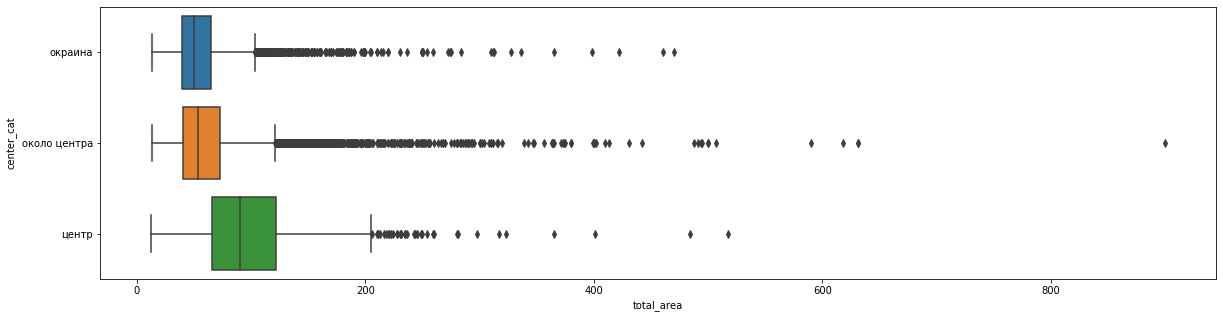

In [ ]:
#визуализация распределения значений общей площади по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="total_area", y="center_cat", data=data)

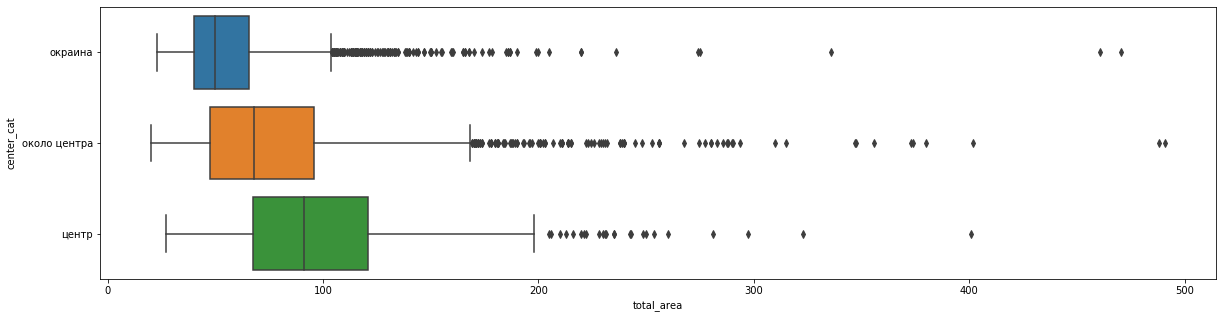

In [ ]:
#визуализация распределения значений общей площади по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="total_area", y="center_cat", data=data_filtered)

Вывод: общая площадь жилья в среднем увеличивается к центру

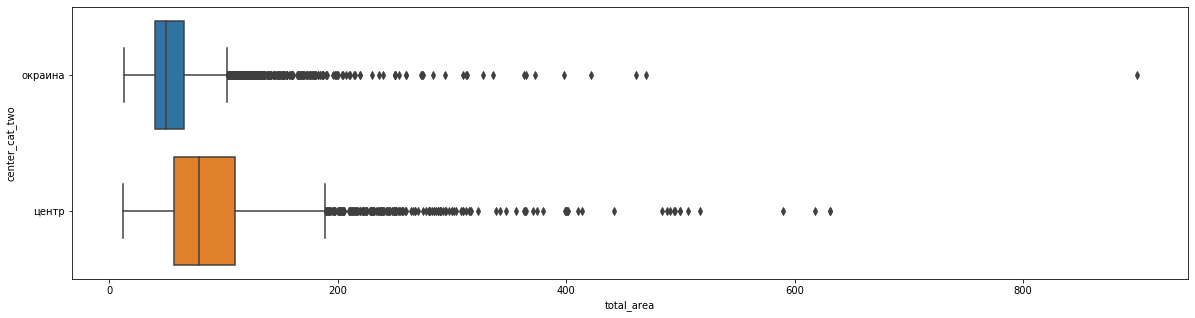

In [ ]:
#визуализация распределения значений общей площади по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="total_area", y="center_cat_two", data=data)

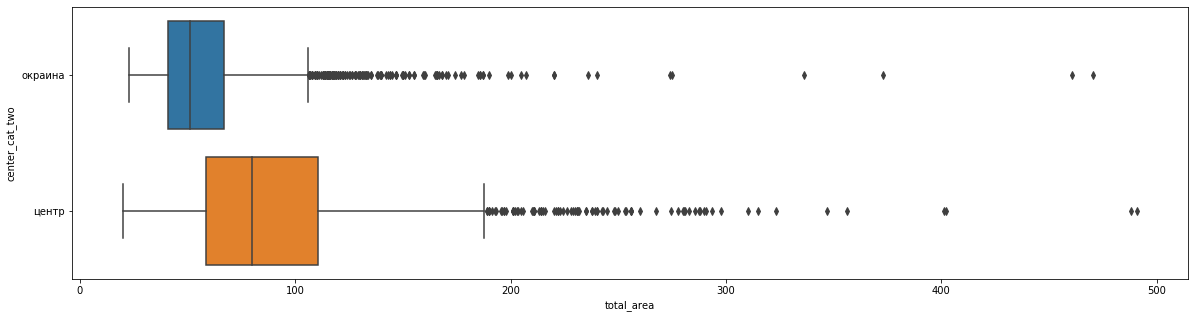

In [ ]:
#визуализация распределения значений общей площади по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="total_area", y="center_cat_two", data=data_filtered)

Вывод (при отнесении к центру зоны до 7 км): общая площадь жилья в среднем увеличивается к центру

#### Цена

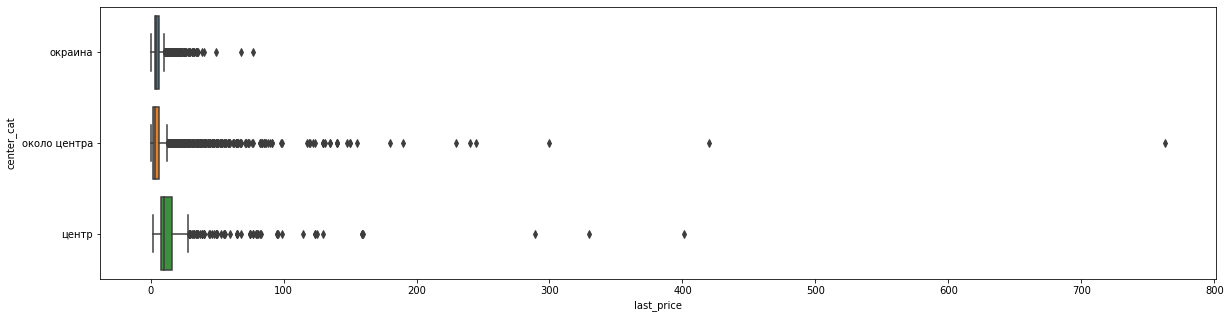

In [ ]:
#визуализация распределения значений цены жилья по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="last_price", y="center_cat", data=data)

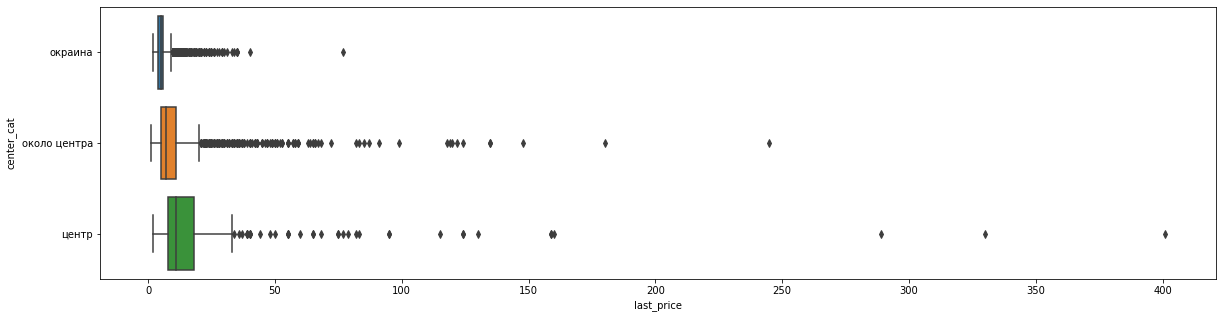

In [ ]:
#визуализация распределения значений цены жилья по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="last_price", y="center_cat", data=data_filtered)

Вывод: цена жилья в среднем увеличивается к центру

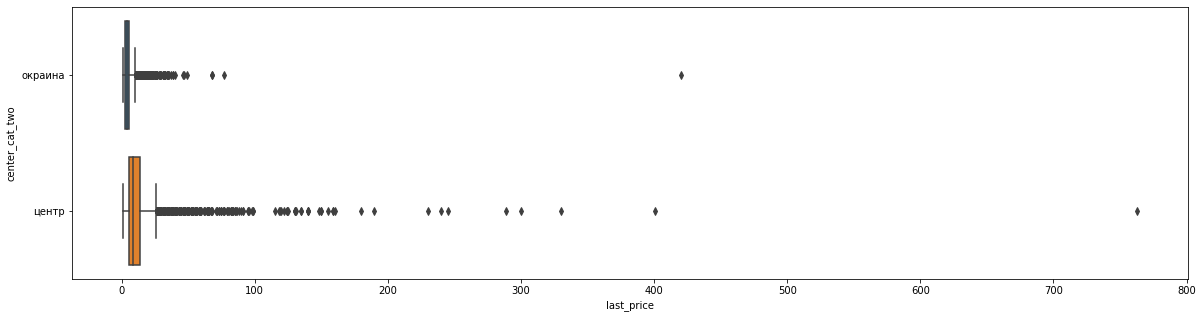

In [ ]:
#визуализация распределения значений цены жилья по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="last_price", y="center_cat_two", data=data)

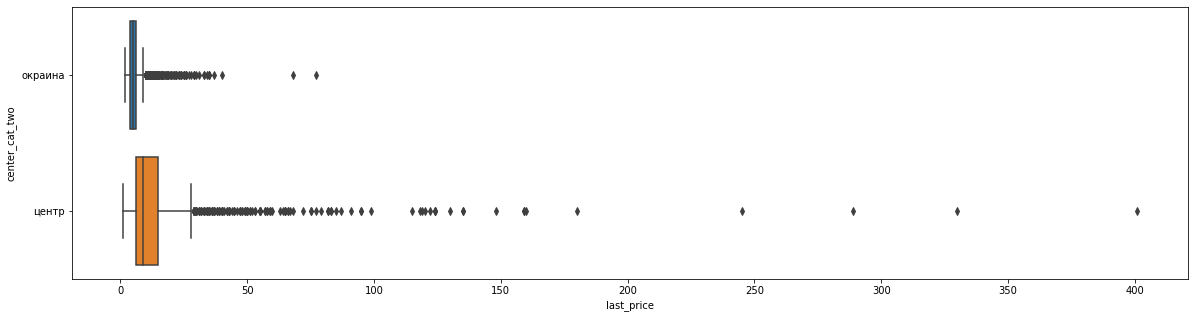

In [ ]:
#визуализация распределения значений цены жилья по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="last_price", y="center_cat_two", data=data_filtered)

Вывод (при отнесении к центру зоны до 7 км): цена жилья в среднем увеличивается к центру

#### Количество комнат

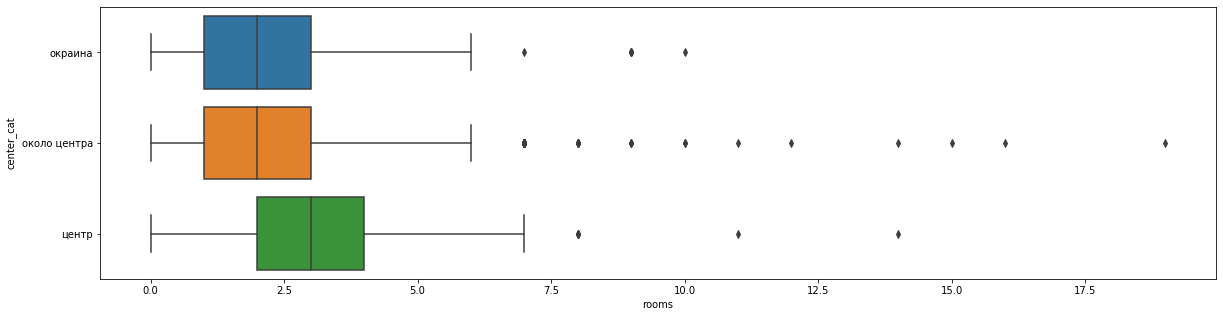

In [ ]:
#визуализация распределения значений количества комнат в жилье по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="rooms", y="center_cat", data=data)

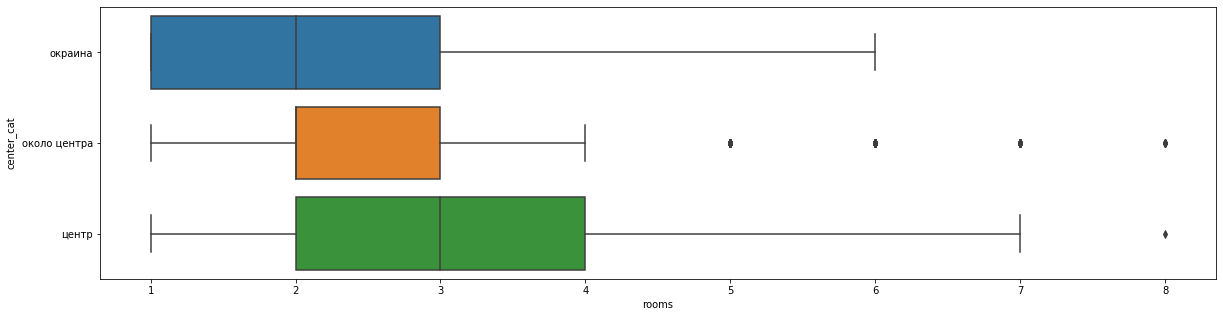

In [ ]:
#визуализация распределения значений количества комнат в жилье по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="rooms", y="center_cat", data=data_filtered)

Вывод: количество комнат в среднем увеличивается к центру

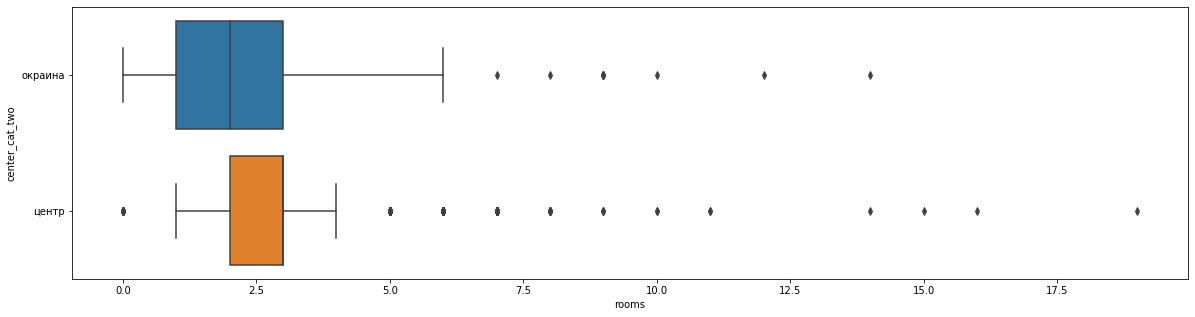

In [ ]:
#визуализация распределения значений количества комнат в жилье по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="rooms", y="center_cat_two", data=data)

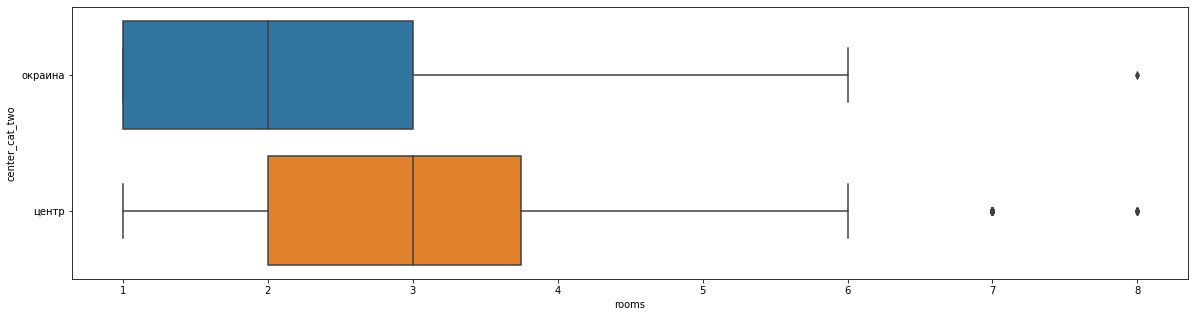

In [ ]:
#визуализация распределения значений количества комнат в жилье по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="rooms", y="center_cat_two", data=data_filtered)

Вывод (при отнесении к центру зоны до 7 км): количество комнат в среднем увеличивается к центру

#### Высота потолка

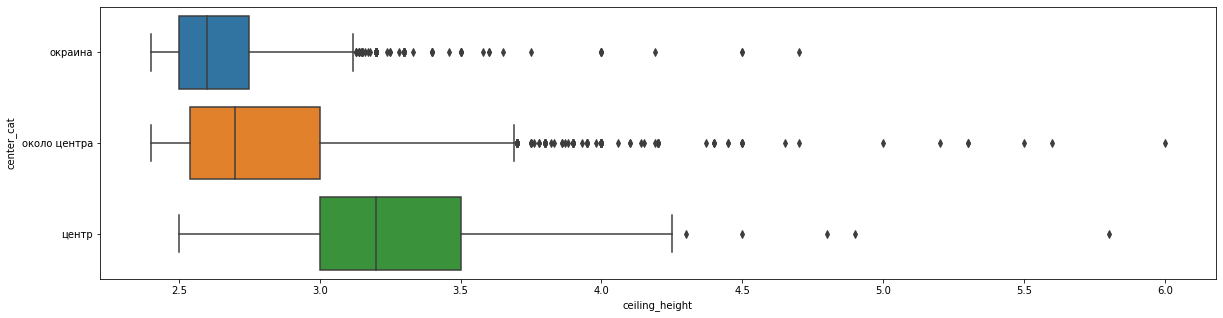

In [ ]:
#визуализация распределения значений высоты потолка жилья по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="ceiling_height", y="center_cat", data=data)

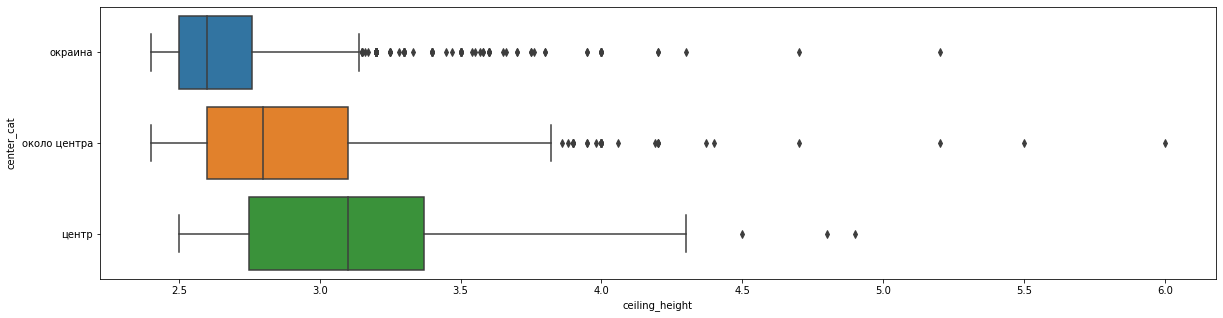

In [ ]:
#визуализация распределения значений высоты потолка жилья по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="ceiling_height", y="center_cat", data=data_filtered)

Вывод: высота потолка в среднем увеличивается к центру

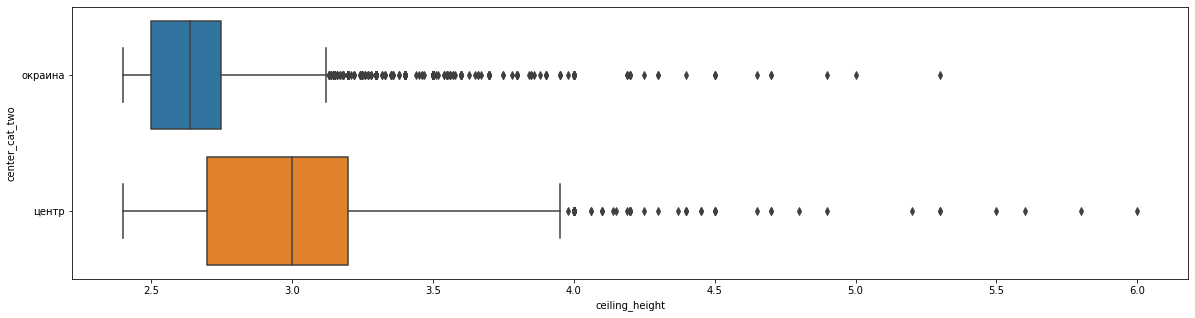

In [ ]:
#визуализация распределения значений высоты потолка жилья по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="ceiling_height", y="center_cat_two", data=data)

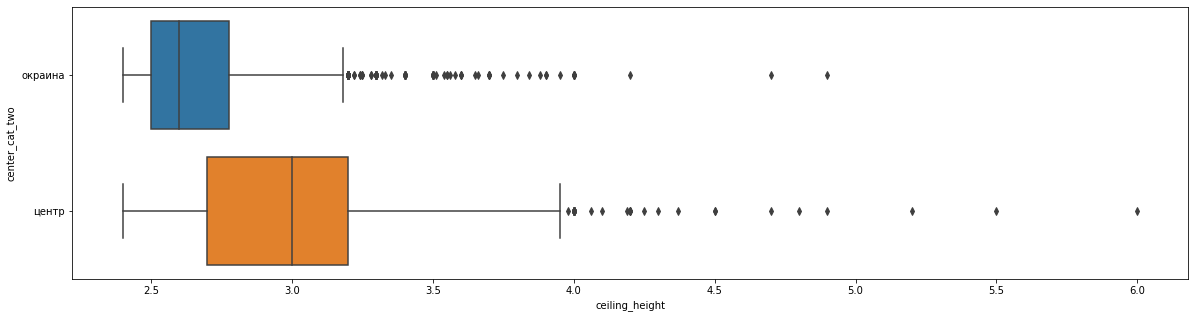

In [ ]:
#визуализация распределения значений высоты потолка жилья по зонам Санкт-Петербурга 
plt.figure(figsize=(20, 5))
ax = sns.boxplot(x="ceiling_height", y="center_cat_two", data=data_filtered)

Вывод (при отнесении к центру зоны до 7 км): высота потолка в среднем увеличивается к центру

Вывод:
Все базовый параметры жилья (общая площадь, цена, высота потолка, количество комнат) в центре в среднем выше, чем в околоцентральной зоне и на окраине. Максимальные значения базовых параметров жилья околоцентральной зоны превосходят аналогичные значения в остальных категориях. Это можно объяснить наличием новостроек премиум-класса в околоцентральной зоне, которые не могут быть построены в историческом центре по причине ограниченности доступного пространства и юридичекими ограничениями, и не имеют достаточного спроса на окраине.

#### Корреляция параметров и цены

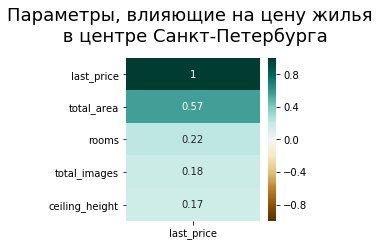

In [ ]:
plt.figure(figsize=(3, 3))
heatmap = sns.heatmap(data.query('center_cat == "центр"').corr()[['last_price']].head().sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, влияющие на цену жилья \n в центре Санкт-Петербурга', fontdict={'fontsize':18}, pad=16);

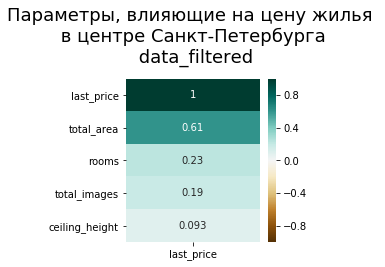

In [ ]:
plt.figure(figsize=(3, 3))
heatmap = sns.heatmap(data_filtered.query('center_cat == "центр"').corr()[['last_price']].head().sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, влияющие на цену жилья \n в центре Санкт-Петербурга \n data_filtered', fontdict={'fontsize':18}, pad=16);

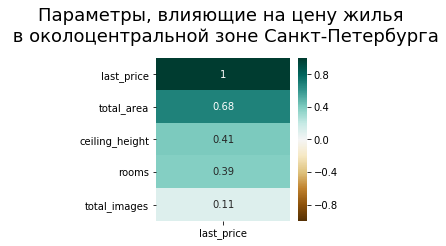

In [ ]:
plt.figure(figsize=(3, 3))
heatmap = sns.heatmap(data.query('center_cat == "около центра"').corr()[['last_price']].head().sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, влияющие на цену жилья \n в околоцентральной зоне Санкт-Петербурга', fontdict={'fontsize':18}, pad=16);

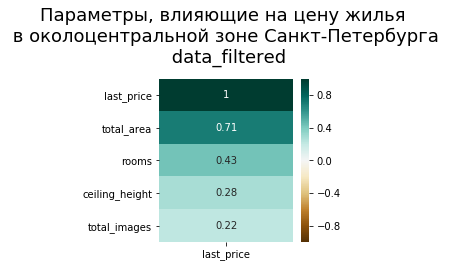

In [ ]:
plt.figure(figsize=(3, 3))
heatmap = sns.heatmap(data_filtered.query('center_cat == "около центра"').corr()[['last_price']].head().sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, влияющие на цену жилья \n в околоцентральной зоне Санкт-Петербурга \n data_filtered', fontdict={'fontsize':18}, pad=16);

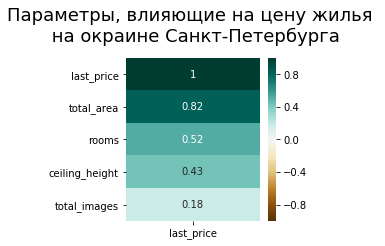

In [ ]:
plt.figure(figsize=(3, 3))
heatmap = sns.heatmap(data.query('center_cat == "окраина"').corr()[['last_price']].head().sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, влияющие на цену жилья \n на окраине Санкт-Петербурга', fontdict={'fontsize':18}, pad=16);

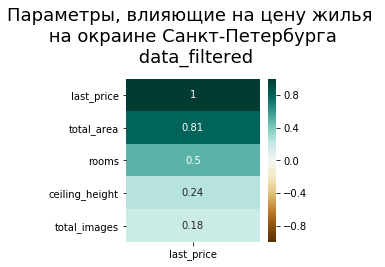

In [ ]:
plt.figure(figsize=(3, 3))
heatmap = sns.heatmap(data_filtered.query('center_cat == "окраина"').corr()[['last_price']].head().sort_values(by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Параметры, влияющие на цену жилья \n на окраине Санкт-Петербурга \n data_filtered', fontdict={'fontsize':18}, pad=16);

Вывод: в центре Санкт-Петербурга на цену  влияет меньшее количество факторов, поскольку важен сам факт того, что жильё находится в центре. В околоцентральной зоне влияет только общая площадь жилья. На окраине на цену жилья также начинает влиять фактор количества комнат. Высота потолка не оказывает существенного влияния на цену жилья независимо от его расположения.

In [ ]:
data_filtered[['last_price', 'sq_m_price',  'total_area', 'rooms', 'ceiling_height']].corr()

,last_price,sq_m_price,total_area,rooms,ceiling_height
last_price,1.000000,0.851054,0.647597,0.374744,0.293216
sq_m_price,0.851054,1.000000,0.369331,0.120019,0.271564
total_area,0.647597,0.369331,1.000000,0.776617,0.388605
rooms,0.374744,0.120019,0.776617,1.000000,0.270662
ceiling_height,0.293216,0.271564,0.388605,0.270662,1.000000


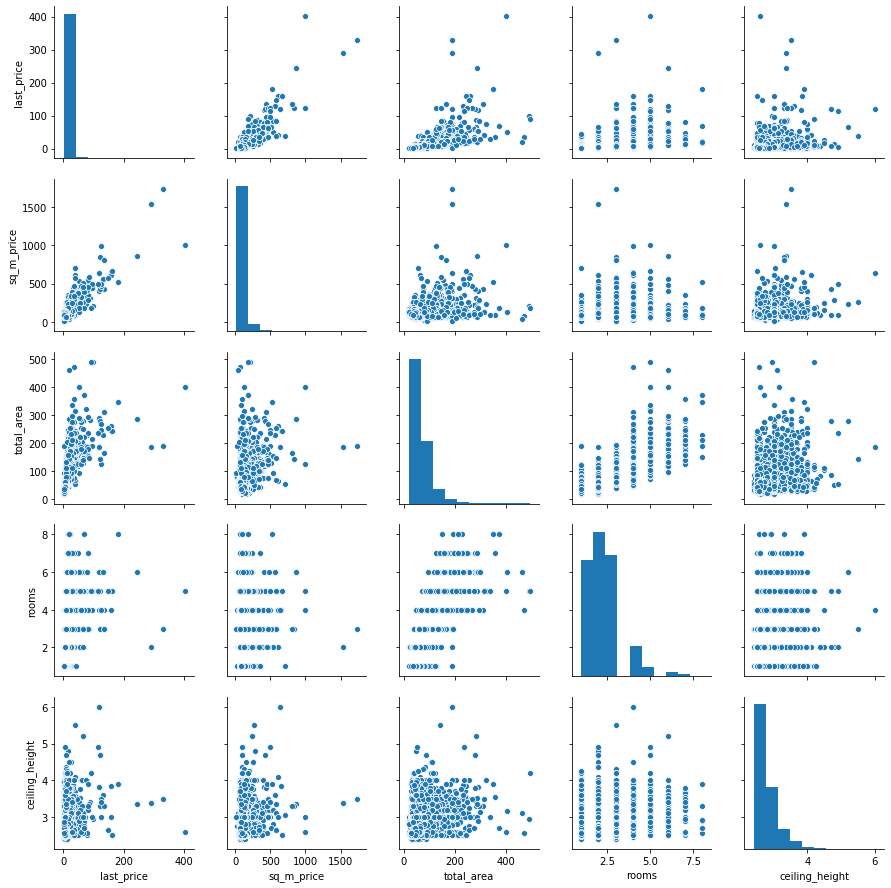

In [ ]:
sns.pairplot(data_filtered[['last_price', 'sq_m_price',  'total_area', 'rooms', 'ceiling_height']]);

Общий вывод: в Санкт-Петербурге есть чёткое разделение по зонам, которое определяет распределение базовых параметров жилья и цену

### Изменение цены квадратного метра во времени

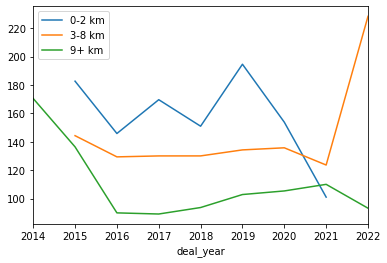

In [ ]:
ax = data.query('locality_name == "Санкт-Петербург" & 0 <= center_km <=2').pivot_table(index = 'deal_year', values = 'sq_m_price').plot();
data.query('locality_name == "Санкт-Петербург" & 3 <= center_km <=8').pivot_table(index = 'deal_year', values = 'sq_m_price').plot(ax = ax);
data.query('locality_name == "Санкт-Петербург" & center_km >= 9').pivot_table(index = 'deal_year', values = 'sq_m_price').plot(ax = ax);
ax.legend(['0-2 km', '3-8 km', '9+ km']);

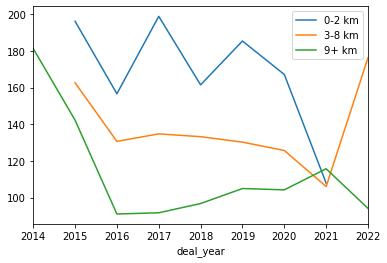

In [ ]:
ax = data_filtered.query('locality_name == "Санкт-Петербург" & 0 <= center_km <=2').pivot_table(index = 'deal_year', values = 'sq_m_price').plot();
data_filtered.query('locality_name == "Санкт-Петербург" & 3 <= center_km <=8').pivot_table(index = 'deal_year', values = 'sq_m_price').plot(ax = ax);
data_filtered.query('locality_name == "Санкт-Петербург" & center_km >= 9').pivot_table(index = 'deal_year', values = 'sq_m_price').plot(ax = ax);
ax.legend(['0-2 km', '3-8 km', '9+ km']);

Цена квадратного метра в разных районах Санкт-Петербурга а) сильно отличается, б) значительно изменяется во времени

## Общий вывод

Установлены следующие параметры:

* количество фотографий: малое кол-во м.б. признаком мошенничества
* общая площадь и производные (жилая площадь, площадь кухни, кол-во комнат) - основные параметры, определяющие цену жилья
* в больших городах важно расстояние от центра, поскольку имеется чёткое разграничение по зонам, определяющим базовые параметры жилья
* этаж - на первом этаже жильё по многим причинам дешевле, на последнем - в целом дороже
* время публикации в целом не определяет цену, но имеются месяцы и дни недели, когда цены отличаются
* цена изменяется от года к году и в больших городах может иметь разные направления изменения в зависимости от зоны

Bug-report
* выявлены пропуски в данных, полученных автоматически по карте. Есть ли возможность их получить?
* одно значение колонки airport_nearest равно 0. Недвижимость не может быть расположена в аэропорту, надо проверить есть ли возможность установить расстояние
* в одной или нескольких колонках с площадями жилья (общая, жилая, кухня) имеются ошибки, что было выявлено при рассмотрении вычисленной колонки нежилой площади - 28 строк со значениями ниже возможных минимальных, и вычисленной колонки разницы общей площади с жилой и кухней - 64 строки с нереальными значениями ниже нуля. Заменить неверные значения некорректно, т.к. не ясна какая из колонок ошибочна.